<a href="https://colab.research.google.com/github/PianoPlayer09/TaxFraud/blob/main/TaxFraudDefault.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("kartik2112/fraud-detection")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/kartik2112/fraud-detection/versions/1


In [ ]:
import pandas as pd

csv_file = f"{path}/fraudTrain.csv"
df = pd.read_csv(csv_file)

# Display the first few rows
print(df.head())

   Unnamed: 0 trans_date_trans_time            cc_num  \
0           0   2019-01-01 00:00:18  2703186189652095   
1           1   2019-01-01 00:00:44      630423337322   
2           2   2019-01-01 00:00:51    38859492057661   
3           3   2019-01-01 00:01:16  3534093764340240   
4           4   2019-01-01 00:03:06   375534208663984   

                             merchant       category     amt      first  \
0          fraud_Rippin, Kub and Mann       misc_net    4.97   Jennifer   
1     fraud_Heller, Gutmann and Zieme    grocery_pos  107.23  Stephanie   
2                fraud_Lind-Buckridge  entertainment  220.11     Edward   
3  fraud_Kutch, Hermiston and Farrell  gas_transport   45.00     Jeremy   
4                 fraud_Keeling-Crist       misc_pos   41.96      Tyler   

      last gender                        street  ...      lat      long  \
0    Banks      F                561 Perry Cove  ...  36.0788  -81.1781   
1     Gill      F  43039 Riley Greens Suite 393  ...  48

In [ ]:
# Rename columns
df.rename(columns={
    'Unnamed: 0': 'id',
    'trans_date_trans_time': 'transaction_datetime',
    'cc_num': 'card_number',
    'merchant': 'business_name',
    'category': 'income_or_deduction_type',
    'amt': 'amount',
    'first': 'taxpayer_first_name',
    'last': 'taxpayer_last_name',
    'gender': 'taxpayer_gender',
    'street': 'taxpayer_street',
    'city': 'taxpayer_city',
    'state': 'taxpayer_state',
    'zip': 'taxpayer_zip',
    'lat': 'taxpayer_lat',
    'long': 'taxpayer_long',
    'city_pop': 'taxpayer_city_population',
    'job': 'taxpayer_job',
    'dob': 'taxpayer_dob',
    'trans_num': 'deduction_or_income_id',
    'unix_time': 'unix_filing_time',
    'merch_lat': 'business_lat',
    'merch_long': 'business_long',
    'is_fraud': 'is_fraudulent'
}, inplace=True)

print("Renamed columns:", df.columns)

Renamed columns: Index(['id', 'transaction_datetime', 'card_number', 'business_name',
       'income_or_deduction_type', 'amount', 'taxpayer_first_name',
       'taxpayer_last_name', 'taxpayer_gender', 'taxpayer_street',
       'taxpayer_city', 'taxpayer_state', 'taxpayer_zip', 'taxpayer_lat',
       'taxpayer_long', 'taxpayer_city_population', 'taxpayer_job',
       'taxpayer_dob', 'deduction_or_income_id', 'unix_filing_time',
       'business_lat', 'business_long', 'is_fraudulent'],
      dtype='object')


In [ ]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

# Fill missing values for categorical and numerical data
df.fillna({
    'income_or_deduction_type': 'Unknown',
    'amount': df['amount'].mean(),
    # Add more columns as needed
}, inplace=True)

Missing Values:
 id                          0
transaction_datetime        0
card_number                 0
business_name               0
income_or_deduction_type    0
amount                      0
taxpayer_first_name         0
taxpayer_last_name          0
taxpayer_gender             0
taxpayer_street             0
taxpayer_city               0
taxpayer_state              0
taxpayer_zip                0
taxpayer_lat                0
taxpayer_long               0
taxpayer_city_population    0
taxpayer_job                0
taxpayer_dob                0
deduction_or_income_id      0
unix_filing_time            0
business_lat                0
business_long               0
is_fraudulent               0
dtype: int64


In [ ]:
from scipy.stats import zscore

# Calculate z-scores for 'amount' and remove rows with z-scores > 3
df['z_score'] = zscore(df['amount'])
df = df[df['z_score'].abs() < 3]
df.drop(columns=['z_score'], inplace=True)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Columns to normalize
numeric_columns = ['amount', 'taxpayer_lat', 'taxpayer_long', 'business_lat', 'business_long', 'taxpayer_city_population']

scaler = MinMaxScaler()
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

print("Normalized columns:")
print(df[numeric_columns].head())

Normalized columns:
     amount  taxpayer_lat  taxpayer_long  business_lat  business_long  \
0  0.007215      0.343968       0.864638      0.351122       0.848602   
1  0.193051      0.618450       0.485682      0.622943       0.486208   
2  0.398186      0.474727       0.546553      0.498724       0.546697   
3  0.079961      0.561509       0.548070      0.579016       0.542619   
4  0.074436      0.394153       0.882190      0.406192       0.882857   

   taxpayer_city_population  
0                  0.001194  
1                  0.000043  
2                  0.001421  
3                  0.000659  
4                  0.000026  


In [ ]:
# One-hot encode categorical columns
categorical_columns = ['income_or_deduction_type', 'taxpayer_job', 'taxpayer_gender', 'taxpayer_state']
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

print("Data after one-hot encoding:", df.head())

Data after one-hot encoding:    id transaction_datetime       card_number  \
0   0  2019-01-01 00:00:18  2703186189652095   
1   1  2019-01-01 00:00:44      630423337322   
2   2  2019-01-01 00:00:51    38859492057661   
3   3  2019-01-01 00:01:16  3534093764340240   
4   4  2019-01-01 00:03:06   375534208663984   

                        business_name    amount taxpayer_first_name  \
0          fraud_Rippin, Kub and Mann  0.007215            Jennifer   
1     fraud_Heller, Gutmann and Zieme  0.193051           Stephanie   
2                fraud_Lind-Buckridge  0.398186              Edward   
3  fraud_Kutch, Hermiston and Farrell  0.079961              Jeremy   
4                 fraud_Keeling-Crist  0.074436               Tyler   

  taxpayer_last_name               taxpayer_street   taxpayer_city  \
0              Banks                561 Perry Cove  Moravian Falls   
1               Gill  43039 Riley Greens Suite 393          Orient   
2            Sanchez      594 White Dale Suit

In [ ]:
# Convert datetime column
df['transaction_datetime'] = pd.to_datetime(df['transaction_datetime'])

# Extract features
df['transaction_hour'] = df['transaction_datetime'].dt.hour
df['transaction_day'] = df['transaction_datetime'].dt.day
df['transaction_month'] = df['transaction_datetime'].dt.month
df['transaction_year'] = df['transaction_datetime'].dt.year

# Drop original datetime column if no longer needed
df.drop(columns=['transaction_datetime'], inplace=True)

In [ ]:
fraud_counts = df['is_fraudulent'].value_counts()
print("Fraudulent and Non-Fraudulent Counts:\n", fraud_counts)

Fraudulent and Non-Fraudulent Counts:
 is_fraudulent
0    1280028
1       3909
Name: count, dtype: int64


In [ ]:

import pandas as pd


# Define features and target
X = df.drop('is_fraudulent', axis=1)  # Features
y = df['is_fraudulent']               # Target

In [ ]:
# Count unique values in each column
categorical_columns = X.select_dtypes(include=['object']).columns
for col in categorical_columns:
    print(f"{col}: {X[col].nunique()} unique values")

business_name: 693 unique values
taxpayer_first_name: 352 unique values
taxpayer_last_name: 481 unique values
taxpayer_street: 983 unique values
taxpayer_city: 894 unique values
taxpayer_dob: 968 unique values
deduction_or_income_id: 1283937 unique values


In [ ]:
# Exclude high-cardinality columns
high_cardinality_columns = ['deduction_or_income_id']  # Add more if needed
X = X.drop(columns=high_cardinality_columns)

In [ ]:
categorical_columns = X.select_dtypes(include=['object']).columns
for col in categorical_columns:
    print(f"{col}: {X[col].nunique()} unique values")


business_name: 693 unique values
taxpayer_first_name: 352 unique values
taxpayer_last_name: 481 unique values
taxpayer_street: 983 unique values
taxpayer_city: 894 unique values
taxpayer_dob: 968 unique values


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Apply label encoding to high-cardinality columns
high_cardinality_columns = [col for col in high_cardinality_columns if col in X.columns]

for col in high_cardinality_columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

In [ ]:
print("Label Encoded Columns:")
for col in high_cardinality_columns:
    if col in X.columns:
        print(f"{col}: {X[col].unique()[:10]}")  # Print first 10 unique encoded values

Label Encoded Columns:


In [ ]:

print("High Cardinality Columns:", high_cardinality_columns)

High Cardinality Columns: []


In [ ]:
# Check for categorical columns
categorical_columns = X.select_dtypes(include=['object']).columns
print("Remaining Categorical Columns:", categorical_columns)

Remaining Categorical Columns: Index(['business_name', 'taxpayer_first_name', 'taxpayer_last_name',
       'taxpayer_street', 'taxpayer_city', 'taxpayer_dob'],
      dtype='object')


In [ ]:
X = X.drop(columns=['taxpayer_first_name', 'taxpayer_last_name', 'taxpayer_street'])
print("Remaining columns after dropping non-informative features:", X.columns)

Remaining columns after dropping non-informative features: Index(['id', 'card_number', 'business_name', 'amount', 'taxpayer_city',
       'taxpayer_zip', 'taxpayer_lat', 'taxpayer_long',
       'taxpayer_city_population', 'taxpayer_dob',
       ...
       'taxpayer_state_VA', 'taxpayer_state_VT', 'taxpayer_state_WA',
       'taxpayer_state_WI', 'taxpayer_state_WV', 'taxpayer_state_WY',
       'transaction_hour', 'transaction_day', 'transaction_month',
       'transaction_year'],
      dtype='object', length=574)


In [ ]:
from datetime import datetime

# Convert DOB to age
current_year = datetime.now().year
X['taxpayer_age'] = current_year - pd.to_datetime(X['taxpayer_dob']).dt.year

# Drop DOB column
X = X.drop(columns=['taxpayer_dob'])

print("Added taxpayer_age column.")

Added taxpayer_age column.


In [ ]:
!pip install imbalanced-learn

In [ ]:
# Separate fraudulent and non-fraudulent cases
fraudulent_cases = df[df['is_fraudulent'] == 1]
non_fraudulent_cases = df[df['is_fraudulent'] == 0].sample(n=100000, random_state=42)

# Combine back into a balanced dataset
balanced_df = pd.concat([fraudulent_cases, non_fraudulent_cases])
print(f"Balanced dataset shape: {balanced_df.shape}")

Balanced dataset shape: (103909, 579)


In [ ]:
# Separate features (X) and target (y)
X = balanced_df.drop(columns=['is_fraudulent'], axis=1)
y = balanced_df['is_fraudulent']

In [ ]:
# Identify non-numeric columns
non_numeric_columns = X.select_dtypes(include=['object']).columns
print(f"Non-numeric columns: {non_numeric_columns}")

# Apply label encoding
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
for col in non_numeric_columns:
    X[col] = label_encoder.fit_transform(X[col])

# Verify all columns are numeric
print(X.dtypes)

Non-numeric columns: Index(['business_name', 'taxpayer_first_name', 'taxpayer_last_name',
       'taxpayer_street', 'taxpayer_city', 'taxpayer_dob',
       'deduction_or_income_id'],
      dtype='object')
id                       int64
card_number              int64
business_name            int64
amount                 float64
taxpayer_first_name      int64
                        ...   
taxpayer_state_WY         bool
transaction_hour         int32
transaction_day          int32
transaction_month        int32
transaction_year         int32
Length: 578, dtype: object


In [ ]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to balance the dataset
X_resampled, y_resampled = SMOTE().fit_resample(X, y)
print(f"Balanced dataset shape after SMOTE: {X_resampled.shape}")

Balanced dataset shape after SMOTE: (200000, 578)


In [ ]:
# Verify class distribution after SMOTE
print("Class distribution after SMOTE:")
print(pd.Series(y_resampled).value_counts())

Class distribution after SMOTE:
is_fraudulent
1    100000
0    100000
Name: count, dtype: int64


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_resampled = pd.DataFrame(scaler.fit_transform(X_resampled), columns=X.columns)

print("Normalized Data Sample:")
print(X_resampled.head())

Normalized Data Sample:
         id   card_number  business_name    amount  taxpayer_first_name  \
0  0.001879  9.119757e-07       0.784682  0.509311             0.447293   
1  0.001896  6.812961e-05       0.411850  0.019131             0.706553   
2  0.001936  6.812961e-05       0.283237  0.500673             0.706553   
3  0.001953  9.119757e-07       0.234104  0.010966             0.447293   
4  0.001959  6.812961e-05       0.473988  0.499618             0.706553   

   taxpayer_last_name  taxpayer_street  taxpayer_city  taxpayer_zip  \
0            0.631250         0.553971        0.18477      0.277632   
1            0.372917         0.285132        0.81187      0.781022   
2            0.372917         0.285132        0.81187      0.781022   
3            0.631250         0.553971        0.18477      0.277632   
4            0.372917         0.285132        0.81187      0.781022   

   taxpayer_lat  ...  taxpayer_state_VA  taxpayer_state_VT  taxpayer_state_WA  \
0      0.342164  

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

Training set shape: (160000, 578)
Testing set shape: (40000, 578)


In [ ]:
import torch
import torch.nn as nn

class TabTransformer(nn.Module):
    def __init__(self, input_dim, num_classes, nhead=2, num_layers=2, dropout=0.2):
        super(TabTransformer, self).__init__()
        d_model = input_dim  # Ensure d_model matches input_dim

        # Linear embedding
        self.embedding = nn.Linear(input_dim, d_model)

        # Transformer layers with dropout
        self.encoder_layer = nn.TransformerEncoderLayer(
            d_model=d_model, nhead=nhead, dropout=dropout
        )
        self.transformer = nn.TransformerEncoder(self.encoder_layer, num_layers=num_layers)

        # Fully connected output layer
        self.fc = nn.Linear(d_model, num_classes)

        # Dropout for regularization
        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
      x = self.embedding(x)  # (batch_size, input_dim)

      x = x.permute(1, 0, 2)  # Change to (seq_len=1, batch_size, d_model)

      x = self.transformer(x)  # Transformer expects (seq_len, batch_size, d_model)

      x = self.fc(x.mean(dim=0))  # Aggregate over seq_len and classify
      return x

In [ ]:
input_dim = X_train.shape[1]  # Feature dimension
model = TabTransformer(input_dim=input_dim, num_classes=2)

/usr/local/lib/python3.11/dist-packages/torch/nn/modules/transformer.py:379: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(


In [ ]:
import torch

# Convert training data to tensors
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.long)

# Convert testing data to tensors
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.long)

In [ ]:
from torch.utils.data import DataLoader, TensorDataset

# Create TensorDataset
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

# Create DataLoader
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [ ]:
from torch.utils.data import Subset

# Reduce dataset to 10,000 samples
subset_size = 30000
indices = range(subset_size)  # Take the first 10,000 indices
reduced_dataset = Subset(train_dataset, indices)

# Create DataLoader with the reduced dataset
batch_size = 32
train_loader = DataLoader(reduced_dataset, batch_size=batch_size, shuffle=True)

In [ ]:
import torch
import matplotlib.pyplot as plt

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.00001, weight_decay=5e-4)

# Store losses for analysis
train_loss_list = []
test_loss_list = []

# Training loop
epochs = 13
for epoch in range(epochs):
    model.train()
    epoch_train_loss = 0

    for batch_inputs, batch_targets in train_loader:
        optimizer.zero_grad()

        # Add sequence length dimension
        batch_inputs = batch_inputs.unsqueeze(1)  # Ensures correct shape

        # Forward pass
        outputs = model(batch_inputs)
        loss = criterion(outputs, batch_targets)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        epoch_train_loss += loss.item()

    # Compute average training loss
    avg_train_loss = epoch_train_loss / len(train_loader)
    train_loss_list.append(avg_train_loss)

    # Compute test loss after each epoch
    model.eval()
    epoch_test_loss = 0
    with torch.no_grad():
        for batch_inputs, batch_targets in test_loader:
            batch_inputs = batch_inputs.unsqueeze(1)  # Ensure correct shape
            outputs = model(batch_inputs)
            loss = criterion(outputs, batch_targets)
            epoch_test_loss += loss.item()

    avg_test_loss = epoch_test_loss / len(test_loader)
    test_loss_list.append(avg_test_loss)

    print(f"Epoch {epoch + 1}/{epochs}, Training Loss: {avg_train_loss:.6f}, Test Loss: {avg_test_loss:.6f}")



Epoch 1/15, Training Loss: 0.284524, Test Loss: 0.188366
Epoch 2/15, Training Loss: 0.178261, Test Loss: 0.158971
Epoch 3/15, Training Loss: 0.138843, Test Loss: 0.118588
Epoch 4/15, Training Loss: 0.112365, Test Loss: 0.097561
Epoch 5/15, Training Loss: 0.095202, Test Loss: 0.094504
Epoch 6/15, Training Loss: 0.082373, Test Loss: 0.080326
Epoch 7/15, Training Loss: 0.071682, Test Loss: 0.072605
Epoch 8/15, Training Loss: 0.063035, Test Loss: 0.074377
Epoch 9/15, Training Loss: 0.056895, Test Loss: 0.065272
Epoch 10/15, Training Loss: 0.051119, Test Loss: 0.063493
Epoch 11/15, Training Loss: 0.045594, Test Loss: 0.063112
Epoch 12/15, Training Loss: 0.041917, Test Loss: 0.062123
Epoch 13/15, Training Loss: 0.036831, Test Loss: 0.058434
Epoch 14/15, Training Loss: 0.034637, Test Loss: 0.061596
Epoch 15/15, Training Loss: 0.031612, Test Loss: 0.052506


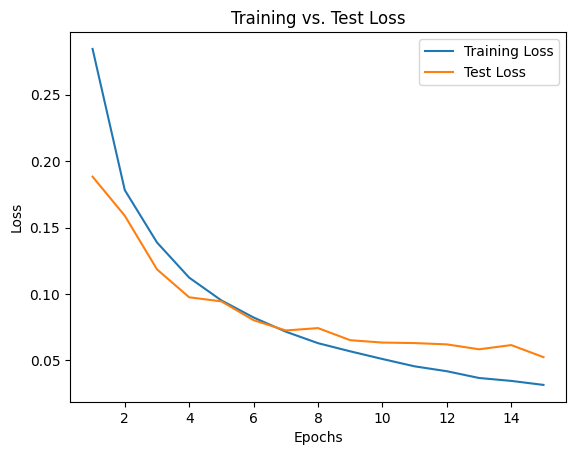

In [ ]:
# Plot Training vs. Test Loss
plt.plot(range(1, epochs + 1), train_loss_list, label="Training Loss")
plt.plot(range(1, epochs + 1), test_loss_list, label="Test Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Training vs. Test Loss")
plt.show()

In [ ]:

import torch
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score

# Set model to evaluation mode
model.eval()

y_true = []
y_pred = []

with torch.no_grad():
    for batch_inputs, batch_targets in test_loader:
        batch_inputs = batch_inputs.unsqueeze(1)  # Ensure correct shape if needed
        outputs = model(batch_inputs)

        # Convert outputs to predicted labels (0 or 1)
        threshold = 0.5
        predicted_labels = (torch.softmax(outputs, dim=1)[:, 1] > threshold).cpu().numpy()
        y_true.extend(batch_targets.cpu().numpy())  # True labels
        y_pred.extend(predicted_labels)  # Model predictions

# Convert to NumPy arrays
y_true = np.array(y_true)
y_pred = np.array(y_pred)

In [ ]:
# Compute metrics
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

# Print results
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Precision: 0.9798
Recall: 0.9607
F1 Score: 0.9701
